In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data=pd.read_csv("/content/drive/MyDrive/traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [5]:
print(np.unique(data["Junction"])) # total number of junction

[1 2 3 4]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
data['DateTime']=pd.to_datetime(data['DateTime'])

data["Year"]=data['DateTime'].dt.year

data["Month"]=data['DateTime'].dt.month

data["Date_no"]=data['DateTime'].dt.day

data["Hour"]=data['DateTime'].dt.hour

data["Day"]= data['DateTime'].dt.strftime("%A")
data

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday


In [8]:
day_mapping = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}

data['Day'] = data['Day'].map(day_mapping)

data

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,7
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,7
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,7
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,7
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,7
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,5
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,5
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,5
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,5


In [9]:
data1 = data[(data['Junction'] == 1)]
data2 = data[(data['Junction'] == 2)]
data3 = data[(data['Junction'] == 3)]
data4 = data[(data['Junction'] == 4)]

In [12]:
X = data[['Junction', 'Hour','Day','ID']]
y = data['Vehicles']

def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# X_train = X_train[['Junction','Hour','DayOfWeek','ID']]
# X_pca2 = X_train1[['Junction','Hour','DayOfWeek','ID']]

# train_x=[]
# train_y=[]
# test_x=[]
# test_y=[]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test= X_test.to_numpy()
y_test=y_test.to_numpy()

# X_train=X_train
# X_test=X_test.T


# y_train=np.to_numpy(y_train)
# y_test=np.to_numpy(y_test)

# y_train=y_train.T
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(y_train[0])

(38496, 4) (9624, 4) (38496,) (9624,)
(38496, 4) (9624, 4) (38496,) (9624,)


Mean Squared Error: 23.943452621269948
58.46583377359807


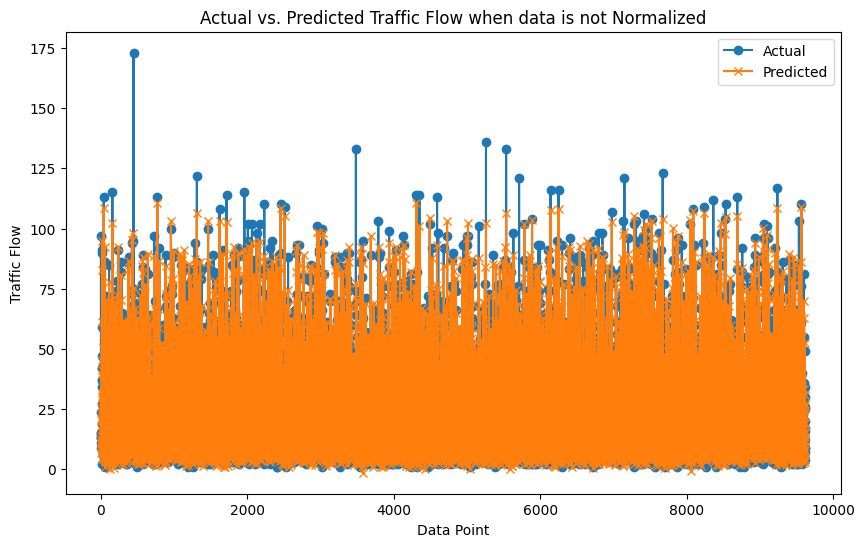

In [25]:
import matplotlib.pyplot as plt

gb_regressor = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.01, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the results
mse_normalised= mean_squared_error(y_test, y_pred*1.2)
print(mse_normalised)
# Plot actual vs. predicted values
# print(len())
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), list(y_test), label='Actual', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', marker='x')
plt.xlabel('Data Point')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow when data is not Normalized')
plt.legend()
plt.show()

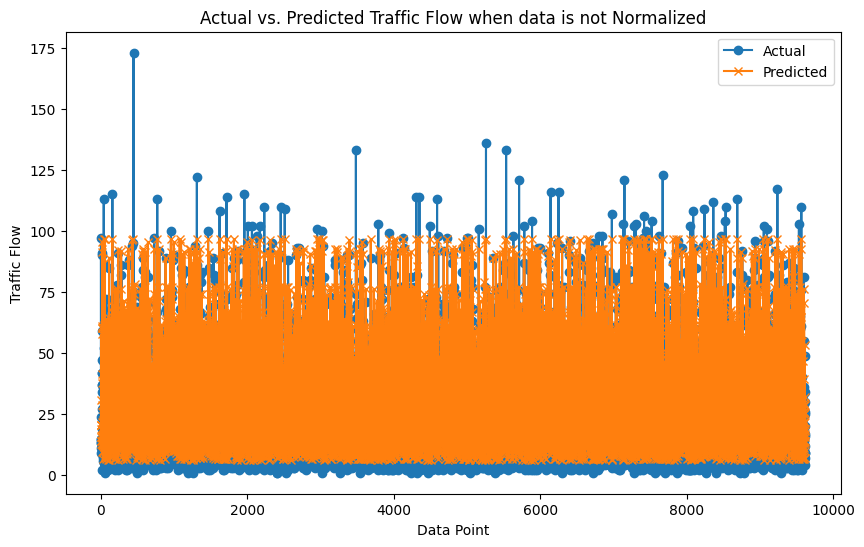

In [19]:

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), list(y_test), label='Actual', marker='o')
plt.plot(range(len(y_pred)), y_pred*1.2, label='Predicted', marker='x')
plt.xlabel('Data Point')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow when data is not Normalized')
plt.legend()
plt.show()

In [ ]:
X = data[['Day', 'ID', 'Junction', 'Hour','Month','']]
y = data['Vehicles']

def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# X_train = X_train[['Junction','Hour','DayOfWeek','ID']]
# X_pca2 = X_train1[['Junction','Hour','DayOfWeek','ID']]

# train_x=[]
# train_y=[]
# test_x=[]
# test_y=[]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test= X_test.to_numpy()
y_test=y_test.to_numpy()

X_train=X_train.T
X_test=X_test.T


# y_train=np.to_numpy(y_train)
# y_test=np.to_numpy(y_test)

# y_train=y_train.T
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(y_train[0])

In [ ]:
DIMENSIONS=X_train.shape[0]

uni_srt_x={i:[] for i in range(DIMENSIONS)}
mid_pts={i:[] for i in range(DIMENSIONS)}
sorted_indices = {i: [] for i in range(DIMENSIONS)}
temp_labels=y_train.copy()
tree_labels=y_train.copy()
complete_tree=y_train.copy()

# print(uni_srt_x)
# print(mid_pts)
# print(sorted_indices)
# print(X_train)
# print(X_train[1])
# print(len(X_train[:][0]))
# print(X_train[:][0])
# print(X_train[0][0])
# print(X_train)

temp=np.sort((X_train[0]))
print(temp)
for p in range(DIMENSIONS):
  uni_srt_x[p]=np.sort((X_train[p]))
  print(uni_srt_x[p])
  # mid_pts[p]=(uni_srt_x[p][:-1] + uni_srt_x[p][1:])/2
  mid_pts[p]=[np.mean(uni_srt_x[p])]
  sorted_indices[p] = np.argsort(X_train[p][:])

print(uni_srt_x)
print(mid_pts)
print(sorted_indices)
print(X_train[0][sorted_indices[0][0]])

In [ ]:
meta_data=[]
def decision_tree(data_x,label_y):
  # print(label_y)
  optimal_ssr=np.inf
  optimal_p=0
  optimal_i=0
  optimal_hl=0
  optimal_hr=0
  for p in range(data_x.shape[0]):
    # print(p)
    lc=0
    rc=len(uni_srt_x[p])
    left_sum=0
    right_sum=0

    for j in sorted_indices[p]:
      right_sum+=(label_y[j])

    prevl_ssr=0
    prevr_ssr=0
    for i in range(len(mid_pts[p])):
      # print(left_sum,label_y[sorted_indices[p][i]],prevl_ssr)
      ssr_l=0
      ssr_r=0

      if i==0:
        lc+=1
        rc-=1
        left_sum+=label_y[sorted_indices[p][i]]
        right_sum-=label_y[sorted_indices[p][i]]
        h_l=left_sum/lc
        h_r=right_sum/rc

        for k in sorted_indices[p][:i+1]:
          ssr_l+=(label_y[k]-h_l)**2

        for k in sorted_indices[p][i+1:]:
          ssr_r+=(label_y[k]-h_r)**2

        ssr=ssr_l+ssr_r
        prevl_ssr=ssr_l
        prevr_ssr=ssr_r

      else:
        v0=label_y[sorted_indices[p][i]]
        L0=(left_sum**2)/lc
        L1=lc*(((left_sum+v0)/(lc+1))**2) + (v0 - (left_sum+v0)/(lc+1))**2

        l_factor=(L1-L0) + 2*(left_sum/lc - (left_sum+v0)/(lc+1))*left_sum

        R0=(rc-1)*((right_sum+v0)/rc)**2 + (v0 - (right_sum+v0)/rc)**2
        R1=(right_sum**2)/(rc-1)

        r_factor=(R1-R0) + 2*(((right_sum + v0)/rc) - (right_sum/(rc-1)))*(right_sum-v0) #Or maybe remove the v0 from this, lets see!!

        lc+=1
        rc-=1
        left_sum+=label_y[sorted_indices[p][i]]
        right_sum-=label_y[sorted_indices[p][i]]
        h_l=left_sum/lc
        h_r=right_sum/rc

        ssr_l=prevl_ssr + l_factor
        ssr_r=prevr_ssr + r_factor

        ssr=ssr_l+ssr_r

        prevl_ssr=ssr_l
        prevr_ssr=ssr_r


      if (ssr<optimal_ssr):
        optimal_ssr=ssr
        optimal_p=p
        optimal_i=i
        optimal_hl=h_l
        optimal_hr=h_r
        optimal_left_sum=left_sum
        optimal_right_sum=right_sum
        opt_lc=lc
        opt_rc=rc


  for idx in sorted_indices[optimal_p][:optimal_i+1]:
    label_y[idx]-=0.01*optimal_hl
  for idx in sorted_indices[optimal_p][optimal_i+1:]:
    label_y[idx]-=0.01*optimal_hr
  # print(optimal_left_sum, optimal_right_sum,opt_lc,opt_rc)
  meta_data.append([optimal_p, optimal_i, 0.01*optimal_hl, 0.01*optimal_hr, optimal_ssr])
  # print(meta_data[-1])

In [ ]:
NUM=1000
for i in range(NUM):
  print(i+1)
  decision_tree(X_train,tree_labels)
  # print(tree_labels)
print(meta_data)

In [ ]:
MSE = [0,]*NUM

print(meta_data)
predictions_arr=[[],]*NUM
for i in range(len(y_test)):
  temp=y_test[i]
  for j in range(NUM):
    left_avg= meta_data[j][2]
    right_avg= meta_data[j][3]
    dimension=  meta_data[j][0]
    cut_point= meta_data[j][1]
    if X_test[dimension][i] <= mid_pts[dimension][cut_point]:
      temp-= left_avg
      predictions_arr[j].append(left_avg)
    else:
      temp-= right_avg
      predictions_arr[j].append(right_avg)
      # temp-= left_avg if X_test[dimension][i] <= mid_pts[dimension][cut_point] else right_avg
    MSE[j]+=temp**2

# print()
# print(predictions_arr)
# print(y_test)
# print()
# print(MSE)

predicti=[]
min=np.inf
min_indx=0
for i in range(len(MSE)):
  if MSE[i] < min:
    min=MSE[i]
    min_indx=i

predicti=predictions_arr[min_indx]



for i in range(NUM):
  MSE[i]/=len(y_test)
print(MSE)
# plt.plot(np.array([i+1 for i in range(NUM)]), np.array(MSE))
print(predictions_arr[min_indx])